In [1]:
import sys
sys.path.append("models/python")

In [6]:
import tentusscher_noble_noble_panfilov_2006_c as model
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

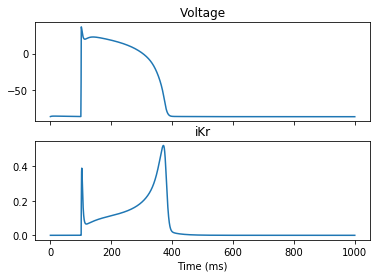

In [7]:
# Initial states
y0 = model.init_state_values()

# Parameters
parameters = model.init_parameter_values()

# Time steps
tsteps = np.arange(0.0, 1000.0, 1E-1)

# Solve ODE
y = odeint(model.rhs, y0, tsteps, args=(parameters,))

# Extract the membrane potential
V_idx = model.state_indices('V')
V = y.T[V_idx]



# Extract monitored values
monitor = np.array([model.monitor(r, t, parameters) for
                    r, t in zip(y, tsteps)])
i_Kr_idx = model.monitor_indices('i_Kr')
i_Kr = monitor.T[i_Kr_idx]

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V)
ax[0].set_title('Voltage')
ax[1].plot(tsteps, i_Kr)
ax[1].set_title('iKr')
ax[1].set_xlabel('Time (ms)')
plt.show()